In [1]:
##install the dependecies 

In [2]:
import numpy as np 
import pandas as pd


In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.style.use('bmh')

In [8]:
df = pd.read_csv("NFLX.csv")

In [9]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-03,343.559998,347.660004,332.649994,336.630005,336.630005,7849600
1,2019-06-04,345.000000,353.609985,343.250000,353.399994,353.399994,7891600
2,2019-06-05,354.380005,357.880005,348.709991,355.730011,355.730011,5020100
3,2019-06-06,354.839996,358.209991,352.089996,357.130005,357.130005,3710000
4,2019-06-07,357.390015,365.149994,355.690002,360.869995,360.869995,4777300


In [10]:
#get the number of trading days 

In [11]:
df.shape

(252, 7)

In [12]:
#visualize the close price data 

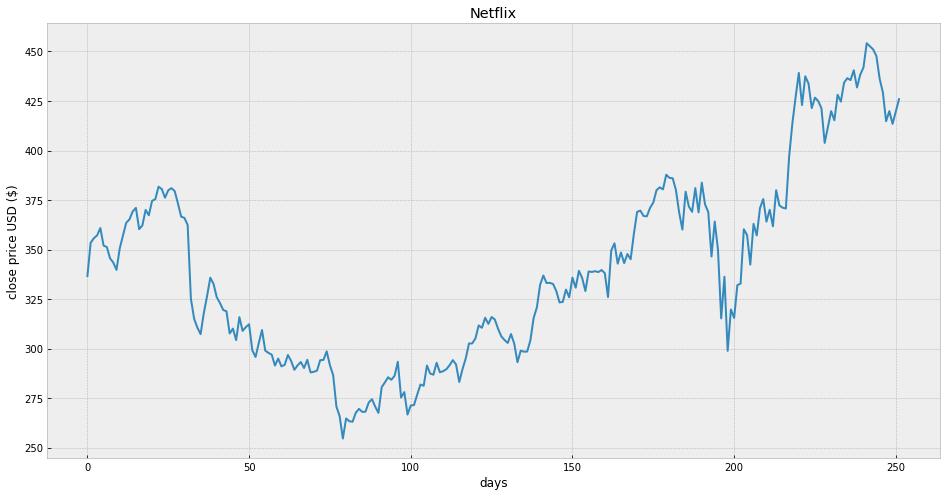

In [13]:
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('days')

plt.ylabel('close price USD ($)')
plt.plot(df['Close'])
plt.show()

In [14]:
#Get the close price 
df = df[['Close']]

In [15]:
df.head()


,Close
0,336.630005
1,353.399994
2,355.730011
3,357.130005
4,360.869995


In [16]:
#crate a variable to predict 'x' days out into the future 
future_days = 25
#Create a new column (target) shifted 'x' unit/days_up
df['prediction'] = df[['Close']].shift(-future_days)
df.head()

,Close,prediction
0,336.630005,379.929993
1,353.399994,381.000000
2,355.730011,379.500000
3,357.130005,373.250000
4,360.869995,366.600006


In [17]:
df.tail()

,Close,prediction
247,414.769989,NaN
248,419.890015,NaN
249,413.440002,NaN
250,419.730011,NaN
251,425.920013,NaN


In [18]:
# create the features dara set (X) and convert it to a numpy array and remove the last 'x' rows/days

X = np.array(df.drop(['prediction'],1))[:-future_days]
print(X)

[[336.630005]
 [353.399994]
 [355.730011]
 [357.130005]
 [360.869995]
 [352.01001 ]
 [351.269989]
 [345.559998]
 [343.429993]
 [339.730011]
 [350.619995]
 [357.119995]
 [363.519989]
 [365.209991]
 [369.209991]
 [371.040009]
 [360.299988]
 [362.200012]
 [370.019989]
 [367.320007]
 [374.600006]
 [375.429993]
 [381.720001]
 [380.549988]
 [376.160004]
 [379.929993]
 [381.      ]
 [379.5     ]
 [373.25    ]
 [366.600006]
 [365.98999 ]
 [362.440002]
 [325.209991]
 [315.100006]
 [310.619995]
 [307.299988]
 [317.940002]
 [326.459991]
 [335.779999]
 [332.700012]
 [325.929993]
 [322.98999 ]
 [319.5     ]
 [318.829987]
 [307.630005]
 [310.100006]
 [304.290009]
 [315.899994]
 [308.929993]
 [310.829987]
 [312.279999]
 [299.109985]
 [295.76001 ]
 [302.799988]
 [309.380005]
 [298.98999 ]
 [297.809998]
 [296.929993]
 [291.440002]
 [294.980011]
 [291.029999]
 [291.769989]
 [296.779999]
 [293.75    ]
 [289.290009]
 [291.519989]
 [293.25    ]
 [290.170013]
 [294.339996]
 [287.98999 ]
 [288.269989]
 [288.

In [19]:
#Create the target data set (y) and convert it to numpy array and get all of the target values except the last 'x' rows/days 

In [20]:
Y =np.array(df['prediction'])[:-future_days]
print(Y)


[379.929993 381.       379.5      373.25     366.600006 365.98999
 362.440002 325.209991 315.100006 310.619995 307.299988 317.940002
 326.459991 335.779999 332.700012 325.929993 322.98999  319.5
 318.829987 307.630005 310.100006 304.290009 315.899994 308.929993
 310.829987 312.279999 299.109985 295.76001  302.799988 309.380005
 298.98999  297.809998 296.929993 291.440002 294.980011 291.029999
 291.769989 296.779999 293.75     289.290009 291.519989 293.25
 290.170013 294.339996 287.98999  288.269989 288.859985 294.149994
 294.290009 298.600006 291.559998 286.600006 270.75     265.920013
 254.589996 264.75     263.309998 263.079987 267.619995 269.579987
 268.029999 268.149994 272.790009 274.459991 270.720001 267.529999
 280.480011 282.929993 285.529999 284.25     286.279999 293.350006
 275.299988 278.049988 266.690002 271.269989 271.5      276.820007
 281.859985 281.209991 291.450012 287.410004 286.809998 292.859985
 288.029999 288.589996 289.570007 291.570007 294.179993 292.01001
 283.1

In [21]:
#split the data into 75% training and 25% teating 


In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= 0.25)

In [23]:
#create the models 
#create the decision tree refressor model 
tree = DecisionTreeRegressor().fit(x_train,y_train)

In [24]:
#create the linear regression model 
lr = LinearRegression().fit(x_train,y_train)

In [25]:
#get the last x rows of the feature data set 
x_future = df.drop(['prediction'],1)[:-future_days]

In [26]:
x_future = x_future.tail(future_days)

In [27]:
x_future = np.array(x_future)

In [28]:
x_future

array([[332.829987],
       [360.269989],
       [357.320007],
       [342.390015],
       [362.98999 ],
       [357.119995],
       [370.959991],
       [375.5     ],
       [364.079987],
       [370.079987],
       [361.76001 ],
       [379.959991],
       [372.279999],
       [371.119995],
       [370.720001],
       [396.720001],
       [413.549988],
       [426.75    ],
       [439.170013],
       [422.959991],
       [437.48999 ],
       [433.829987],
       [421.420013],
       [426.700012],
       [424.98999 ]])

In [29]:
#Show the model tree prediction 
tree_prediction  = tree.predict(x_future)

In [30]:
print(tree_prediction)

[421.380005 322.98999  411.890015 419.850006 415.269989 317.940002
 325.929993 434.26001  426.75     435.549988 440.519989 431.820007
 438.269989 441.950012 454.190002 452.579987 413.440002 447.670013
 419.890015 429.320007 419.890015 419.890015 413.440002 419.730011
 425.920013]


In [31]:
#show the model linear regression prediction 


In [32]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[339.82787913 361.60540409 359.26417588 347.4151143  363.76410982
 359.10543805 370.08943355 373.6925732  364.6291767  369.39102583
 362.78794662 377.23220725 371.13704671 370.21641937 369.89896752
 390.5336471  403.89062361 414.36670122 424.22373925 411.35879271
 422.89040324 419.98567289 410.13660223 414.32702867 412.96988421]


<ipython-input-33-bc4478b60e7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


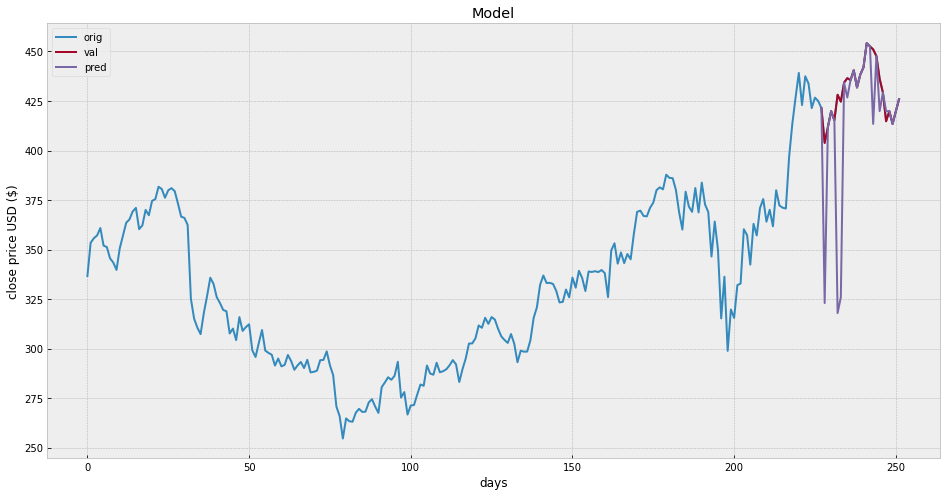

In [33]:
#Visualize data 
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('days')

plt.ylabel('close price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['orig','val','pred'])
plt.show()


<ipython-input-34-3575ea0adf0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


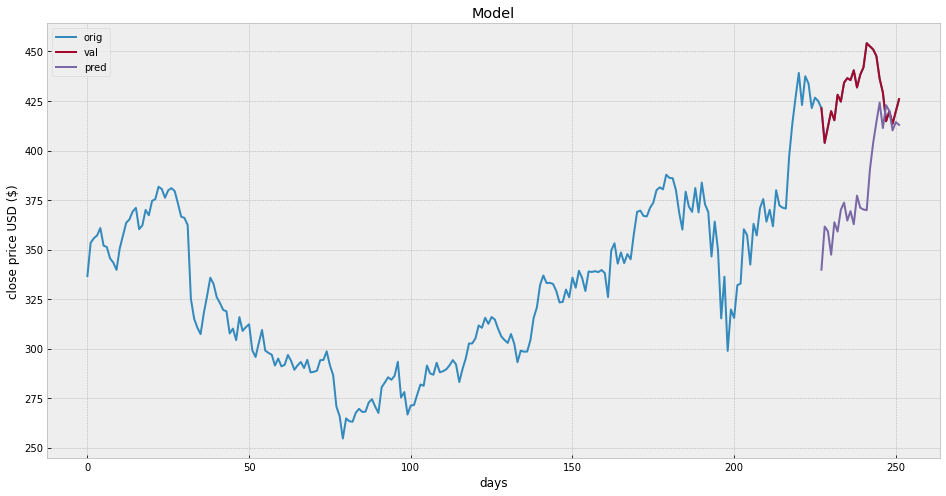

In [34]:
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('days')

plt.ylabel('close price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['orig','val','pred'])
plt.show()